In [50]:
using Graphs
using DocStringExtensions
using CairoMakie
using Revise
using RNAStructPlot
using LinearAlgebra

rnagraph = dotbracketbase(
    "CCGAUAGAGGCGUGCGGUCAAGGUCCGG", 
    "(((((...(((.....)))...)).)))"
)

RNABaseGraph(SimpleGraph{Int64}(35, [[2, 28], [1, 3, 27], [2, 4, 26], [3, 5, 24], [4, 6, 23], [5, 7], [6, 8], [7, 9], [8, 10, 19], [9, 11, 18]  …  [9, 18, 20], [19, 21], [20, 22], [21, 23], [5, 22, 24], [4, 23, 25], [24, 26], [3, 25, 27], [2, 26, 28], [1, 27]]), Dict{Any, Char}(5 => 'U', 16 => 'G', 20 => 'A', 12 => 'G', 24 => 'U', 28 => 'G', 8 => 'A', 17 => 'G', 1 => 'C', 19 => 'C'…), Dict{Any, Any}(5 => 23, 4 => 24, 11 => 17, 10 => 18, 2 => 27, 9 => 19, 3 => 26, 1 => 28))

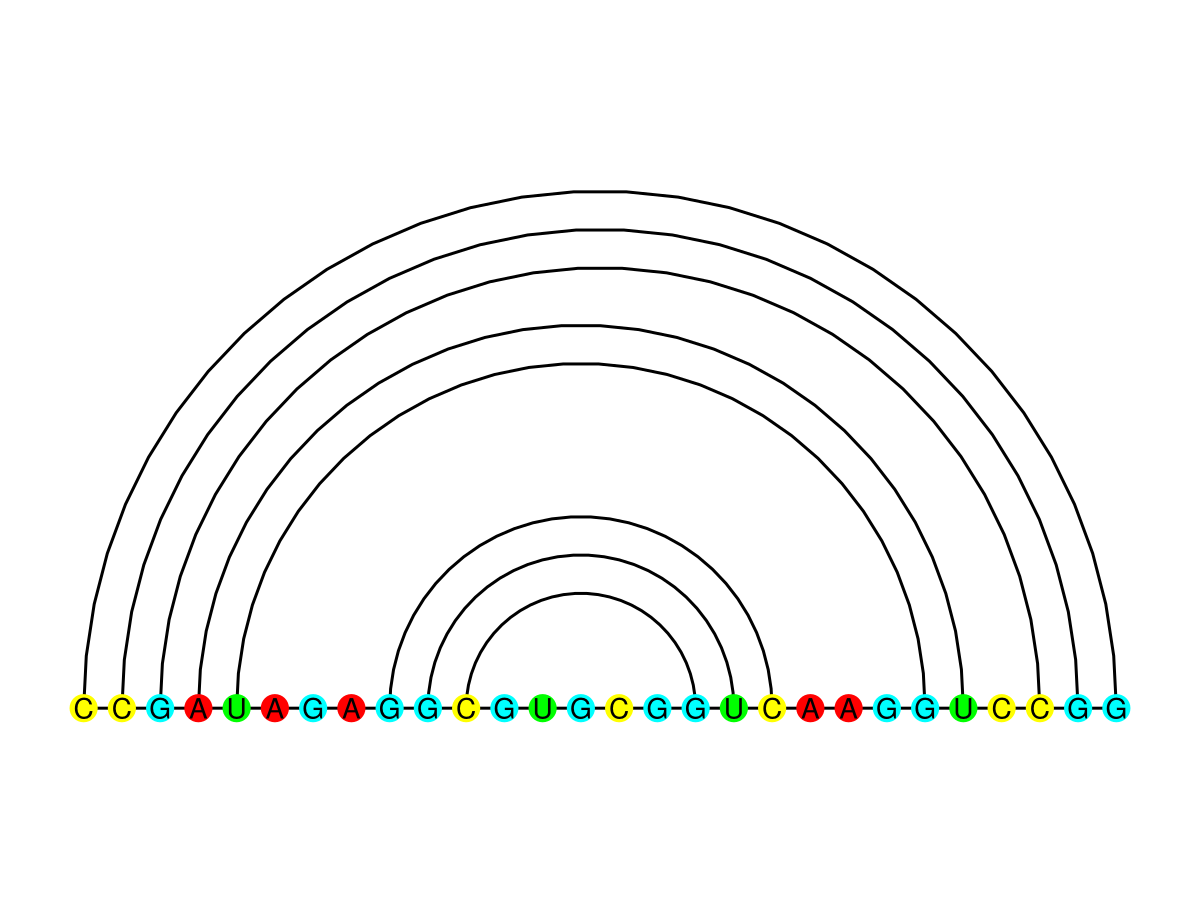

In [ ]:
using CairoMakie
using Graphs

"""
Return a list of equidistant points of an arc 
- centered at `(x,y)` 
- scaled by `(width, height)`. 
"""
function squishedarc(x0.0, y=0.0,width=1.0,height=1.0,precision=32)
    return [[width * cos(angle) , height * sin(angle)] + [x, y] for angle in range(0, pi, precision)]
end

function draw_arcs(
    rnastruct::RNABaseGraph;
    squish=(1.0, 1.0),
    basecolors=Dict('A' => :red,'G' => :cyan,'C' => :yellow,'U' => :lime),
    bondcolor=:black,
    showstrength=true
)
    
    graph = rnastruct.graph
    bases = rnastruct.nucleotides
    pairs = rnastruct.pairings

    f = Figure()
    ax = Axis(f[1,1], aspect=DataAspect())
    
    for e in edges(graph)
        diameter = abs(src(e)-dst(e))
        radius = diameter/2
        
        if haspair(rnastruct, src(e), dst(e))
            # draw base pair connected by approximated squished arc with dash distance as bond strength
            arc = squishedarc((dst(e)-radius)*squish[1], 0, radius*squish[1], radius*squish[2])
            
            strength = showstrength ? bondstrength(rnastruct, src(e), dst(e)) : 0
            lines!(getindex.(arc, 1), getindex.(arc, 2); linestyle=(:dash, strength^1.8), color=bondcolor)
        else
            # else draw a straight line between sequence neighbors
            lines!(squish[1] .* [src(e), dst(e)], [0, 0], color=:black)
        end
    end

    # draw base markers
    markercolors = [basecolors[bases[v]] for v in vertices(graph)]
    scatter!(vertices(graph) .* squish[1], repeat([0], nv(graph)), color=markercolors, markersize=20)

    # draw base labels
    for v in vertices(graph)
        text!(v * squish[1], 0, text=string(bases[v]),align=(:center, :center))
    end
    
    hidedecorations!(ax)
    hidespines!(ax)
    
    current_figure()
end

draw_arcs(rnagraph; showstrength=false)